In [1]:
import os
import pandas as pd
import re

In [2]:
df=pd.read_csv('suicidio_notacion.csv')

In [3]:
f = open('stopwords.txt') # Open file on read mode
stopwords = f.read().split("\n") # Create a list containing all lines
f.close() # Close file

In [4]:
def delete_sw(frase):
	sin=[word for word in frase.split() if word not in stopwords]
	#print('Stopwords',sin)
	if len(sin)==0:
		return frase
	else:
 		return ' '.join(sin)

In [5]:
df['tweet_clean']=df['tweet_clean'].apply(delete_sw)

In [6]:
def get_random_data():
	#texto, clase = load_data(url_data_csv)
	#print(texto) 
	#data_select = pd.DataFrame({'tweet_clean': texto,'suicidio': clase})
	#print(data_select.shape)
	balanced = df.groupby('suicidio').apply(sampling_k_elements).reset_index(drop=True)
	return balanced

# Toma 'k' datos random del dataset
def sampling_k_elements(group, k=500): 
    if len(group) < k:
        return group
    return group.sample(k)

In [7]:
#bal=get_random_data()
bal=df
#bal.suicidio=bal.suicidio.astype(str)

In [8]:
bal.suicidio=bal.suicidio.replace(1,'suicidal')
bal.suicidio=bal.suicidio.replace(0,'not suicidal')

### Distribuição dos dados por período de tempo

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Tweets Number')

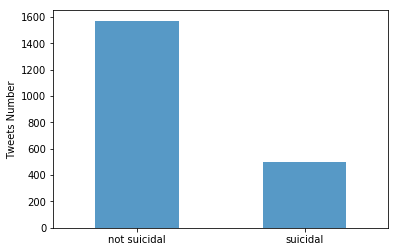

In [10]:
#df['suicidio'].value_counts().plot.bar()
bal['suicidio'].value_counts().plot(kind='bar',alpha=0.75, rot=0)
plt.ylabel('Tweets Number')
#ax.set_xticklabels(in_mes)

In [11]:
bal.tail()

,frase,tweet_clean,suicidio
2063,data de similaridad,suicidarme,suicidal
2064,data de similaridad,yendo suicidarme,suicidal
2065,data de similaridad,sale suicidarme,suicidal
2066,data de similaridad,no suicidarme,suicidal
2067,data de similaridad,suicidarme,suicidal


### Vocabulario

In [12]:
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

### Nuvem geral de palavras

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
no_sui = bal.loc[bal.suicidio=='not suicidal']
si_sui = bal.loc[bal.suicidio=='suicidal']

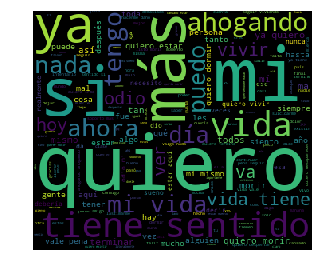

In [15]:
text = ' '.join(no_sui.tweet_clean)
wordcloud = WordCloud(max_font_size=100,width = 350, height = 300).generate(text)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

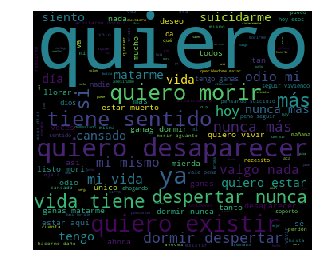

In [16]:
text = ' '.join(si_sui.tweet_clean)
wordcloud = WordCloud(max_font_size=100,width = 350, height = 300).generate(text)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Scatter 

In [17]:
import numpy as np
import scattertext as st
import spacy
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

### Esquerda vs Direita

In [18]:
corpus = (st.CorpusFromPandas(bal, 
                              category_col='suicidio', 
                              text_col='tweet_clean',
                              nlp = st.whitespace_nlp_with_sentences)
          .build())

In [19]:
html = st.produce_scattertext_explorer(
    corpus,
    category='suicidal',
    not_categories=['not suicidal'],
    minimum_term_frequency=5,
    sort_by_dist=False,
    term_scorer=st.RankDifference(),
)
file_name = 'rotten_fresh_st.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1300, height=700)

/home/kid/anaconda3/lib/python3.7/site-packages/scattertext/frequencyreaders/DefaultBackgroundFrequencies.py:30: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  names=['word', 'background'])
/home/kid/anaconda3/lib/python3.7/site-packages/scattertext/frequencyreaders/DefaultBackgroundFrequencies.py:30: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  names=['word', 'background'])


In [20]:
#html_file_name = "RV-Parks-Campgrounds-Yelp-Review-Scattertext.html"
open('suicidio.html', 'wb').write(html.encode('utf-8'))

547355

### BOLSONARO VS CIRO

In [ ]:
df2=df[(df.Candidato=='Bolsonaro')|(df.Candidato=='Ciro Gomes')]
#|(df.Candidato=='Marina silva')

In [ ]:
corpus = (st.CorpusFromPandas(df2, 
                              category_col='Candidato', 
                              text_col='Text_clean',
                              nlp = st.whitespace_nlp_with_sentences)
          .build())
#corpus.get_term_freq_df().to_csv('term_freqs_kid.csv')
#unigram_corpus = corpus.get_unigram_corpus()

In [ ]:
html = st.produce_scattertext_explorer(
    corpus,
    category='Bolsonaro',
    not_categories=['Ciro Gomes'],
    minimum_term_frequency=20,
    sort_by_dist=False,
    term_scorer=st.RankDifference(),
)
file_name = 'rotten_fresh_st.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1300, height=700)

### BOLSONARO VS MARINA

In [ ]:
df3=df[(df.Candidato=='Bolsonaro')|(df.Candidato=='Marina silva')]

In [ ]:
corpus2 = (st.CorpusFromPandas(df3, 
                              category_col='Candidato', 
                              text_col='Text_clean',
                              nlp = st.whitespace_nlp_with_sentences)
          .build())

In [ ]:
html = st.produce_scattertext_explorer(
    corpus2,
    category='Bolsonaro',
    not_categories=['Marina silva'],
    minimum_term_frequency=20,
    sort_by_dist=False,
    term_scorer=st.RankDifference(),
)
file_name = 'rotten_fresh_st.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1300, height=700)

### BOLSONARO VS Alvaro Diaz

In [ ]:
df3=df[(df.Candidato=='Bolsonaro')|(df.Candidato=='Alvaro Dias')]

In [ ]:
corpus2 = (st.CorpusFromPandas(df3, 
                              category_col='Candidato', 
                              text_col='Text_clean',
                              nlp = st.whitespace_nlp_with_sentences)
          .build())

In [ ]:
html = st.produce_scattertext_explorer(
    corpus2,
    category='Bolsonaro',
    not_categories=['Alvaro Dias'],
    minimum_term_frequency=20,
    sort_by_dist=False,
    term_scorer=st.RankDifference(),
)
file_name = 'rotten_fresh_st.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1300, height=700)

### CIRO VS MARINA

In [ ]:
df4=df[(df.Candidato=='Ciro Gomes')|(df.Candidato=='Marina silva')]

In [ ]:
corpus3 = (st.CorpusFromPandas(df4, 
                              category_col='Candidato', 
                              text_col='Text_clean',
                              nlp = st.whitespace_nlp_with_sentences)
          .build())

In [ ]:
corpus3.remove_infrequent_words

In [ ]:
html = st.produce_scattertext_explorer(
    corpus3,
    category='Ciro Gomes',
    not_categories=['Marina silva'],
    minimum_term_frequency=20,
    sort_by_dist=False,
    term_scorer=st.RankDifference(),
)
file_name = 'rotten_fresh_st.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1300, height=700)

### ciro vs alvaro diaz

In [ ]:
df4=df[(df.Candidato=='Ciro Gomes')|(df.Candidato=='Alvaro Dias')]

In [ ]:
corpus3 = (st.CorpusFromPandas(df4, 
                              category_col='Candidato', 
                              text_col='Text_clean',
                              nlp = st.whitespace_nlp_with_sentences)
          .build())

In [ ]:
html = st.produce_scattertext_explorer(
    corpus3,
    category='Ciro Gomes',
    not_categories=['Alvaro Dias'],
    minimum_term_frequency=20,
    sort_by_dist=False,
    term_scorer=st.RankDifference(),
)
file_name = 'rotten_fresh_st.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1300, height=700)

## Gerando n-grams para word2vec analisis

#### 2-grams,3-grams,4-grams 

In [ ]:
from nltk import ngrams
from collections import Counter
n = 2
grams= ngrams(' '.join(df.Text_clean).split(), n)

In [ ]:
ct=Counter(grams)
first_ten_words = ['_'.join(word) for word,cnt in ct.most_common(50)]

In [ ]:
first_ten_words[:10]

### Word2vec

In [ ]:
import gensim
from sklearn.decomposition import PCA
from matplotlib import pyplot
doc='/home/kid/Documentos/analisis2018/dynamic-nmf-master-2018/out/w2v-model_setembro3.bin'
m1 = gensim.models.Word2Vec.load(doc) 

#### Sanity Check

In [ ]:
#Pdt + Ciro_gomes – psdb
m1.wv.most_similar(positive=['ciro_gomes','psdb'], negative = ['pdt'])[0]

In [ ]:
m1.wv.most_similar(positive=['rede','jair_bolsonaro'], negative = ['marina_silva'])[0]

In [ ]:
m1.wv.most_similar(positive=['pdt','jair_bolsonaro'], negative = ['psl'])[0]

In [ ]:
m1.wv.most_similar(positive=['energia','natural'])

In [ ]:
m1.wv.most_similar(positive=['eólica','sol'],negative = ['ar'])[1]

In [ ]:
m1.wv.most_similar(positive=['direita','ciro_gomes'],negative = ['jair_bolsonaro'])[0]

In [ ]:
m1.wv.most_similar(positive=['esquerda','jair_bolsonaro'],negative = ['ciro_gomes'])[0]

In [ ]:
m1.wv.most_similar(positive=['petrobras','elétrica'],negative = ['petróleo'])

In [ ]:
m1.wv.most_similar(positive=['pobre'],negative = ['bolsa'])

In [ ]:
m1.wv.most_similar(positive=['pobre','bolsa'])

In [ ]:
m1.wv.most_similar(positive=['filhos','avô'],negative = ['pai'])

In [ ]:
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk
from sklearn import cluster
from sklearn import metrics

In [ ]:
X = m1[m1.wv.vocab]
NUM_CLUSTERS=30
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

In [ ]:
words = list(m1.wv.vocab)
for i, j in zip(assigned_clusters,words):
    if i==0:
        print(j)

In [ ]:
print (assigned_clusters)
 
words = list(m1.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))


kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

In [ ]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word,topn=15)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [ ]:
display_closestwords_tsnescatterplot(m1, 'maconha')

# Doc2vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec
import matplotlib.pyplot as plt
model2 = Doc2Vec.load('./modeloDoc2vec_setembro_premas40')
#model2 = Doc2Vec.load('/home/kid/Documentos/analisis2018/modelD2v_set_db0_vs200_300it')
labels = list(model2.docvecs.doctags.keys())

In [ ]:
nomesx=['Alva','Bols','Ciro','Gera','Guil','Henr','Joao','Mari']
vecs_todo=[]
lbs_todo=[]
#ncandi=['Mari','Bols','Joao']
ncandi=nomesx
for la in labels:
    if la[0:4] in ncandi:
            vecs_todo.append(model2.docvecs[la])
            lbs_todo.append(la[0:4])

In [ ]:
len(vecs_todo)

In [ ]:
def set_color(labls):
    colorList=[]
    for t in labls:
        if t[0:4] == 'Bols':
            color='r'
            colorList.append(color)
        if t[0:4] == 'Ciro':
            color='b'
            colorList.append(color)
        if t[0:4] == 'Alva':
            color='#9C661F'
            colorList.append(color)
        if t[0:4] == 'Gera':
            color='#7FFF00'
            colorList.append(color)
        if t[0:4] == 'Guil':
            color='#FFB90F'
            colorList.append(color)
        if t[0:4] == 'Mari':
            color='black'
            colorList.append(color)
        if t[0:4] == 'Henr':
            color='violet'
            colorList.append(color)
        if t[0:4] == 'Joao':
            color='aqua'
            colorList.append(color)
    return colorList    

In [ ]:
lc=set_color(lbs_todo)

In [ ]:
import gensim
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy as np
import matplotlib.patches as mpatches


cads=['Alvaro Dias','Jair Bolsonaro','Ciro Gomes','Geraldo Alckmin','Guilherme Boulos','Henrique Meirelles','João Amoêdo','Marina Silva']
mc=['#9C661F','r','b','#7FFF00','#FFB90F','violet','aqua','black']

junto=[]
for candi, color in zip(cads,mc):
    junto.append(mpatches.Patch(color=color, label=candi))
print(len(junto))
#doc='/home/kid/Documentos/analisis2018/dynamic-nmf-master-2018/out/w2v-model_todo_20_2.bin'
#l2 = gensim.models.Word2Vec.load(doc) 
#X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
#text_array = np.asarray(docvec, dtype='float')
result = pca.fit_transform(vecs_todo) #vecs_grande
# create a scatter plot of the projection
fig = plt.figure(figsize=(10, 7))
pyplot.scatter(result[:, 0], result[:, 1],c=lc)
plt.legend(handles=junto,fontsize=8.5,loc=(0.75, 0.67))
#pyplot.figure(figsize=(1,1))
words = labels #labels doc_weigth
#for i, word in enumerate(words):
    #pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.patches as mpatches

cads=['Alvaro Dias','Jair Bolsonaro','Ciro Gomes','Geraldo Alckmin','Guilherme Boulos','Henrique Meirelles','João Amoêdo','Marina Silva']
mc=['#9C661F','r','b','#7FFF00','#FFB90F','violet','aqua','black']

inputVec=vecs_todo #aqui

junto=[]
for candi, color in zip(cads,mc):
    junto.append(mpatches.Patch(color=color, label=candi))
print(len(junto))
       
#lc=set_color(labels) #labels lb_gra sel_lbs
pca = PCA(n_components=3)
result = pca.fit_transform(inputVec)

# Create the figure
#%matplotlib notebook

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
plt.legend(handles=junto,fontsize=8,loc=(0.7, 0.56))



#plt.figure()
# Generate the values
ax.scatter(result[:, 0], result[:, 1],result[:, 2],c=lc, s=10)


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

#plt.savefig("clus3D_original2.jpg", facecolor="w", dpi=240)
plt.show()

### Similirade mutua

In [ ]:
def doubleRelation():
    labels = list(model2.docvecs.doctags.keys())
    candidatos=1
    simi_min=0.65
    simi_max=1
    lx=[]
    ly=[]
    ln=[]
    todo=[]
    color_todo=[]
    for i in labels:
        simi=model2.docvecs.most_similar(i,topn=candidatos)
        for x in simi:
            x=list(x)
            simi_vuelta=model2.docvecs.most_similar(x[0],topn=candidatos)
            for y in simi_vuelta:
                y=list(y)
                if (x[1]>=simi_min and x[1]<=simi_max) and (y[1]>=simi_min and y[1]<=simi_max) and  (i == y[0]):
                    if (x[0] not in ly) and (x[0] not in lx):
                        ly.append(x[0])
                        lx.append(y[0])
                        ln.append(round(x[1],2))
                        if x[0][0:4] == y[0][0:4]:
                            color_todo.append('dodgerblue')
                        else:
                            color_todo.append('sandybrown')
    for f,g,n in zip(lx,ly,ln):
        todo.append(('('+f+', '+g+')',n))
    return todo, color_todo

In [ ]:
todo,cl=doubleRelation()

In [ ]:
todo

In [ ]:
import numpy as np                                                               
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
def plotChartDouble():
    todo,cl=doubleRelation()
    top=todo
    #print(cl)
    #--------------------------------------
    #for d in todo:
        #print(d)
    #--------------------------------------
    values=[]
    for t in top:
        values.append(t[1])
    labels, ys = zip(*top)
    yss=[0.6,0.7,0.8,0.9,1]
    xs = np.arange(len(labels)) 
    width = 0.7
    plt.ylabel('Similaridade')
    plt.xlabel('Relacionamento de discurso')
    low = min(values)
    high = max(values)
    plt.ylim([math.ceil(low-0.5*(high-low)), 1])
    plt.bar(xs, ys, width, align='center',color=cl)
    red_patch = mpatches.Patch(color='dodgerblue', label='Candidatos iguais')
    blue_patch = mpatches.Patch(color='sandybrown', label='Candidatos diferentes')
    plt.legend(handles=[red_patch,blue_patch])
    plt.xticks(xs, labels,rotation=90) #Replace default x-ticks with xs, then replace xs with labels
    plt.yticks(yss)
    plt.savefig('./doubleSimilarity.jpg', dpi=120)

In [ ]:
plotChartDouble()

In [ ]:
np.random.seed(104)
cities = ['New York', 'Boston', 'San Francisco', 'Seattle', 'Los Angeles', 'Chicago']
car_sales = pd.DataFrame({
 'sales':np.random.randint(1e3,1e4,len(cities)),
 'goal':np.random.randint(4e3,8e3,len(cities)),
 'sales_last_year':np.random.randint(1e3,1e4,len(cities)),
}, index=cities)
#ax = car_sales.sales.plot(kind='bar')

car_sales_sorted = car_sales.sort_values('sales',ascending=False)
#ax = car_sales_sorted.sales.plot(kind='bar',facecolor='#AA0000')
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))



ax = car_sales_sorted.sales.plot(
 kind='barh',
 color=['#AA0000' if row.sales > row.goal else '#000088' for name,row in car_sales_sorted.iterrows()],
 )

percent_of_goal = ["{}%".format(int(100.*row.sales/row.goal)) for name,row in car_sales_sorted.iterrows()]
 
for i,child in enumerate(ax.get_children()[:car_sales_sorted.index.size]):
    ax.text(child.get_bbox().x1+200,i,percent_of_goal[i], verticalalignment ='center')

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(0)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(0)
ax.yaxis.set_ticklabels([
 'Seattle: City of Fish',
 'New York: City of Taxis',
 'Los Angeles: City of Stars and Smog',
 'Boston: City of Sox',
 'Chicago: City of Bean',
 'San Francisco: City of Rent'
 ], fontstyle='italic')#={'weight':'bold'}
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'a':[23, 13, 20, 17, 14, 22],
                   'b':[25, 21, 19, 14, 23, 11]},
                   index=['bob', 'john', 'paul', 'david', 'michael', 'neil'])

a_vals = df.a
#b_vals = df.b
ind = np.arange(df.shape[0])
width = 0.35

# Set the colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']


def autolabel(bars):
    # attach some text labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width*0.95, bar.get_y() + bar.get_height()/2,
                '%d' % int(width),
                ha='right', va='center')

# make the plots
fig, ax = plt.subplots()
a = ax.barh(ind, a_vals, width, color = colors) # plot a vals
#b = ax.barh(ind + width, b_vals, width, color = colors, alpha=0.5)  # plot b vals
ax.set_yticks(ind)  # position axis ticks
ax.set_yticklabels(df.index)  # set them to the names
#ax.legend(a[0], 'a', loc='center right')

autolabel(a)
autolabel(b)

plt.show()

### similirade entre candidatos

In [ ]:
from operator import itemgetter
from collections import Counter
def similarity_candidates():
    #Preparando dados
    labels = list(model2.docvecs.doctags.keys())
    nomes=[]
    for t in labels:
        nomes.append(t[0:4])
    ct=Counter(nomes)
    indices = sorted(ct, key=itemgetter(0))
    datos = sorted(labels, key=itemgetter(0,1,2))
    indices=['Alva','Bols','Ciro','Gera','Guil','Henr','Joao','Mari']
    #formando duplas para comparacion
    todo=[]
    fm='out'
    for ixd in indices:
        tmp=[]
        otros=[]
        for doc_i in datos:
            if ixd==doc_i[0:4]:
                #if doc_i[5:8]==fm:
                tmp.append(doc_i)
            else:
                # doc_i[5:8]==fm:
                otros.append(doc_i)
        ls=[]
        for t in tmp:
            for o in otros:
                ls.append(t+' '+o)
        todo.append(ls)
    #print(todo)    
    #calculando similaridad
    for lista in todo:
        for xd in indices:
            suma=0
            di=0
            mostrar=''
            for elem in lista:
                if xd == elem.split()[1][0:4]:
                    can=elem.split()
                    simi=model2.docvecs.similarity(can[0],can[1])
                    if simi>0.0:
                        mostrar=can[0][0:4]+' -> '+can[1][0:4]
                        suma=suma+simi
                        di=di+1
            if suma>0 and di>0:
                print('Similaridad: '+mostrar+' = '+str(round(suma/di,3))+' com: '+str(di))
        #print('-------------------------------------------------------------------------')
        print('*****************************************************************************')

In [ ]:
similarity_candidates()

### Grafico similitud entre candidatos media

In [ ]:
indices=['Alva','Bols','Ciro','Gera','Guil','Henr','Joao','Mari']
este=indices[0]
todo=[]
for ix in indices:
    mini=1
    for u in plotk:
        if u[0]==ix and u[2]<mini:
            mini=u[2]
            este=u
    todo.append(este)

In [ ]:
todo

In [ ]:
drawing_graph(todo,True)

### Constantes discursos

In [ ]:
import networkx as nx

In [ ]:
def drawing_graph(tuples,etiqueta):
    G=nx.DiGraph()
    G.add_weighted_edges_from(tuples)
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = 'b', node_size = 70)
    nx.draw_networkx_labels(G, pos,font_size=10,font_color='red')
    nx.draw_networkx_edges(G, pos, edge_color='black')
    simi = nx.get_edge_attributes(G,'weight')
    if etiqueta: 
        nx.draw_networkx_edge_labels(G, pos, edge_color='black',edge_labels=simi, arrowss=True,font_size=6)
    #nx.draw_networkx_edges(G, pos, arrows=True)
    plt.savefig("graph_dependence.png", facecolor="w", dpi=120)
    plt.show()
    
def sortLabels():
    mes=['ant','out','nov','dez','jan','fev','mar','abr','mai','jun','jul','ago','set']
    #mes.reverse()
    labels = list(model2.docvecs.doctags.keys())
    sorterData=[]
    for m in mes:
        for la in labels:
            if m==la[5:8]:
                 sorterData.append(la)
    return sorterData

def concurrent_recu(topp,nom):
    mes=['ant','out','nov','dez','jan','fev','mar','abr','mai','jun','jul','ago','set']
    #mes.reverse()
    datos=sortLabels()
    tuples_todo=[]
    nomb=nom
    i=0
    for d in datos:        
        if d[0:4]==nomb:
            parar=False
            while parar==False:
                simi=model2.docvecs.most_similar(d,topn=topp)
                for si in simi:
                    if si[0][0:4]==nomb and mes.index(d[5:8])+1== mes.index(si[0][5:8]) and si[1]>0.55: 
                        tuples_todo.append((d,si[0],round(si[1], 2)))
                        if si is datos:
                            datos.remove(si[0])
                        d=si[0]
                        parar=False
                        break
                    else:
                        parar=True           
    return tuples_todo

In [ ]:
drawing_graph(concurrent_recu(20,'Guil'),True)

### Coherencia de discursos

In [ ]:
from operator import itemgetter
from collections import Counter
def similarity_work():
    #Preparando dados
    mes=['ant','out','nov','dez','jan','fev','mar','abr','mai','jun','jul','ago','set']
    labels = list(model2.docvecs.doctags.keys())
    nomes=[]
    for t in labels:
        nomes.append(t[0:4])
    ct=Counter(nomes)
    indices = sorted(ct, key=itemgetter(0))
    datos = sorted(labels, key=itemgetter(0,1,2))
    
    todo=[]
    for x in indices:
        candi=[]
        for y in datos:
            if x==y[0:4]:
                candi.append(y)
        todo.append(candi)
    #print(todo)
    todo_data=[]
    name_data=[]
    mm=''
    for t in todo: # lista de candidatos
        #print(t)
        anames=[]
        for v in mes:
            suma=0
            div=0
            mos=''            
            for term_i in t:
                for term_j in t:
                    if term_j != term_i and (term_i[5:8] == v and term_j[5:8] == v): #geral ou pelo mes                   
                        simi=model2.docvecs.similarity(term_i,term_j)
                        suma=suma+simi
                        div=div+1
                        mos=term_i
            if suma>0 and div>0:
                anames.append((mos[5:8],round(float(suma/div),3)))
                mm=mos[0:4]
                #print(mos[0:8]+' '+str(round(float(suma/div),3))+' div: '+str(div))
        todo_data.append(anames)
        name_data.append(mm)
        #print('*****************************************************************************')
    return todo_data, name_data

In [ ]:
cd=['Bols', 'Ciro', 'Gera', 'Mari','Joao','Guil','Alva','Henr']
kx=['ant','out','nov','dez','jan','fev','mar','abr','mai','jun','jul','ago','set']
ce=[0,0,0,0,0,0,0,0,0,0,0,0,0]
kd, nm =similarity_work()
y=[]
x=[]
#y.append(0.5)
#x.append('ant')
plt.figure(figsize=(10, 7))
plt.plot(kx,ce , "_")
for li,n in zip(kd,nm):
    if n in cd:
        #print(li)
        for i in li:
            y.append(i[1])
            x.append(i[0])
            #print(i[0])

        #print('---------')
        
        plt.plot(x, y, ".-", label=n)
        #plt.xticks(kx, rotation=60)
        plt.ylabel("Coerência")
        plt.xlabel('Periodos do tempo')
        y=[]
        x=[]
plt.legend(loc=(.02, .02), prop={'size':12})
plt.savefig('./sss.jpg', dpi=120)

### Tfidf vectoriser

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf=True, norm=None, ngram_range=(1, 1)) 
#X = tfidf.fit_transform(te)
matrix = tfidf.fit_transform(df.Text_clean).toarray()
vectors=list(matrix)
print(len(vectors))

In [ ]:
labels=[x[0:4] for x in df.Candidato]

In [ ]:
nomesx=['Alvaro Dias','Jair Bolsonaro','Ciro Gomes','Geraldo Alckmin','Guilherme Boulos','Henrique Meirelles','João Amoêdo','Marina Silva']
ncandi=['Bols', 'Ciro', 'Gera', 'Mari','Joao','Guil','Alva','Henr']
vecs_todo=[]
lbs_todo=[]
#ncandi=['Mari','Bols','Joao']
#ncandi=nomesx
for la, ve in zip(labels,vectors):
    if la in ncandi:
            vecs_todo.append(ve)
            lbs_todo.append(la)

In [ ]:
lc=set_color(lbs_todo)

In [ ]:
len(lc)

In [ ]:
import numpy as np                                                               
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import gensim
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
cads=['Alvaro Dias','Jair Bolsonaro','Ciro Gomes','Geraldo Alckmin','Guilherme Boulos','Henrique Meirelles','João Amoêdo','Marina Silva']
mc=['#9C661F','r','b','#7FFF00','#FFB90F','violet','aqua','black']

junto=[]
for candi, color in zip(cads,mc):
    junto.append(mpatches.Patch(color=color, label=candi))
print(len(junto))

pca = PCA(n_components=2)
#text_array = np.asarray(docvec, dtype='float')
result = pca.fit_transform(vecs_todo) #vecs_grande
# create a scatter plot of the projection
fig = plt.figure(figsize=(10, 7))
pyplot.scatter(result[:, 0], result[:, 1],c=lc)
plt.legend(handles=junto,fontsize=8.5,loc=(0.025, 0.65))
#pyplot.figure(figsize=(1,1))
words = labels #labels doc_weigth
#for i, word in enumerate(words):
    #pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
#plt.legend()
pyplot.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#cads=['Alva','Bols','Ciro','Gera','Guil','Henr','Joao','Mari']
mc=['#9C661F','r','b','#7FFF00','#FFB90F','violet','aqua','black']

inputVec=vecs_todo #aqui

junto=[]
for candi, color in zip(cads,mc):
    junto.append(mpatches.Patch(color=color, label=candi))
print(len(junto))
       
#lc=set_color(labels) #labels lb_gra sel_lbs
pca = PCA(n_components=3)
result = pca.fit_transform(inputVec)

# Create the figure
%matplotlib notebook

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
plt.legend(handles=junto,fontsize=8,loc=(0.7, 0.56))



#plt.figure()
# Generate the values
ax.scatter(result[:, 0], result[:, 1],result[:, 2],c=lc, s=10)


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

#plt.savefig("clus3D_original2.jpg", facecolor="w", dpi=240)
plt.show()

In [ ]:
from operator import itemgetter
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import operator
labels=df.abreviatura
dict_labels = dict(zip(labels, vectors))
print(len(dict_labels))
nomes=[]
for t in labels:
    nomes.append(t[0:4])
ct=Counter(nomes)
indices = sorted(ct, key=itemgetter(0))
datos = sorted(dict_labels.items(),key = operator.itemgetter(0),reverse = False)
#datos = sorted(dict_labels.items(), key=itemgetter(0,1,2))
todo=[]
for ixd in indices:
    tmp=[]
    otros=[]
    for doc_i in datos:
        if ixd==doc_i[0][0:4]:
            tmp.append(doc_i)
        else:
            otros.append(doc_i)
    #print(tmp)
    ls=[]
    for t in tmp:
        for o in otros:
            ls.append((t,o))
    todo.append(ls)
for lista in todo:
    for xd in indices:
        suma=0
        di=0
        mostrar=''
        for elem in lista:
            a=elem[0]
            b=elem[1]
            if xd == b[0][0:4]: #e
                #print((a[1]))
                simi=cosine_similarity(a[1].reshape(1, -1),b[1].reshape(1, -1))
                #print(simi[0][0])
                mostrar=a[0][0:4]+' -> '+b[0][0:4]
                suma=suma+simi[0][0]
                di=di+1
        if suma>0 and di>0:
            print('Similaridad: '+mostrar+' = '+str(round(suma/di,3))+' con: '+str(di))
        #print('-------------------------------------------------------------------------')
    print('*****************************************************************************')

## Clustering

## Usando vectores IDTIF

In [ ]:
content,labels = get_doc2('/home/kid/Documentos/analisis2018/dynamic-nmf-master-2018/data/sample_valido/')
tfidf = TfidfVectorizer(use_idf=False, norm=None, ngram_range=(1, 1)) 
matrix = tfidf.fit_transform(content).toarray()
vectors=list(matrix)
	#otra cosa
	nmf = NMF(n_components=k, 
						  random_state=100).fit_transform(vectors)
	def find_max_index(li):
		m = max(li)
		if li.count(m) >1:
			return -99
		else:
			return li.index(m)

	doc_topic_dist_unnormalized = np.matrix(nmf)
	doc_topic_dist_unnormalized = [x.tolist()[0] for x in doc_topic_dist_unnormalized]
	#ref = list(zip(doc_topic_dist_unnormalized, list(content),labels))#OJO ORDEN
	nmf_cls=[]
	for t in doc_topic_dist_unnormalized:
		nmf_cls.append(find_max_index(t))
		
	return nmf_cls,labels,content


In [ ]:
from gensim.models.doc2vec import Doc2Vec
model2 = Doc2Vec.load('./modeloDoc2vec_agosto')
labels = list(model2.docvecs.doctags.keys())

In [ ]:
vecs_todo=[]
lbs_todo=[]
for la in labels:
    vecs_todo.append(model2.docvecs[la])
    lbs_todo.append(la[0:4])

In [ ]:
len(vecs_todo)

In [ ]:
numk=30

In [ ]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nmf = NMF(n_components=numk, 
                      random_state=100).fit_transform(scaler.fit_transform(vecs_todo))
def find_max_index(li):
    m = max(li)
    if li.count(m) >1:
        return -99
    else:
        return li.index(m)

In [ ]:
import numpy as np
import pandas as pd    
doc_topic_dist_unnormalized = np.matrix(nmf)
#print(str(len(doc_topic_dist_unnormalized)))
doc_topic_dist_unnormalized = [x.tolist()[0] for x in doc_topic_dist_unnormalized]
#print(str(len(doc_topic_dist_unnormalized[0])))
ref = list(zip(doc_topic_dist_unnormalized,labels))#OJO ORDEN
df2 = pd.DataFrame(ref)
df2.columns =["nmf","etiq"]
df2["cluster_no"] = df2["nmf"].apply(lambda x : find_max_index(x))

In [ ]:
a=df2.groupby("cluster_no")["nmf"].count()

In [ ]:
a

In [ ]:
for n,l in zip(df2["cluster_no"],labels):
    if n==6:
        print(str(n)+' '+l)

### LDA model

df=pd.read_pickle('./pandas_data_candidatos.pd')

## Built lda model puro

In [ ]:
import pandas as pd
df=pd.read_pickle('./pandas_data_candidatos__premas.pd')

texts=[]
for a in df.Text_clean:
    texts.append(a.split())
    
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=40, id2word = dictionary, passes=40)

In [ ]:
ldamodel.print_topics(num_topics=40 ,num_words=10)

In [ ]:
#dictionary.save('./lda_models/candidatos45.dict')
ldamodel.save('./lda_models/lda_model_precandi_40')

In [ ]:
from gensim.models import CoherenceModel
k=[]
def compute_coherence_values(dictionary, corpus, texts, limit, start, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        k.append(str(num_topics))
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=50)
        print('Terminado model k= '+str(num_topics))
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, start=7, limit=50, step=3)

In [ ]:
coherence_values

In [ ]:
import matplotlib.pyplot as plt
start=7; limit=50; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
model_list[10].print_topics(num_topics=100 ,num_words=10)

In [ ]:
coherence_values

## no borrar 7-40-3 pass 30

In [ ]:
import matplotlib.pyplot as plt
start=10; limit=50; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## no borrar 10-20-1 pass 30

In [ ]:
import matplotlib.pyplot as plt
start=10; limit=21; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for i, mo in zip(k,model_list):
    path='poli_lda_10_50_3_p30_k'+str(i)
    mo.save('./lda_models/'+path)

In [ ]:
model_list[3].print_topics(num_topics=18 ,num_words=10)

## mallet LDA

In [ ]:
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel
import pandas as pd

df=pd.read_pickle('./pandas_data_candidatos__premas.pd')

texts=[]
for a in df.Text_clean:
    texts.append(a.split())
    
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
dictionary.save('./lda_models/lda_precandi.dict')

In [ ]:
k2=[]
def compute_coherence_values2(dictionary, corpus, texts, limit, start, step=1):
    coherencemodel_cv = []
    coherencemodel_umass=[]
    model_list2 = []
    mallet_path = '/home/kid/Documentos/LMCD/mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path
    for num_topics in range(start, limit, step):
        k2.append(str(num_topics))
        model=gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        print('Terminado model k= '+str(num_topics))
        model_list2.append(model)
        cohe_cv = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') 
        cohe_umass = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherencemodel_cv.append(cohe_cv.get_coherence())
        coherencemodel_umass.append(cohe_umass.get_coherence())

    return model_list2, coherencemodel_cv, coherencemodel_umass

In [ ]:
modelLists=[]
ch_cvLists=[]
ch_umssLists=[]
for it in range(3):
    model_list, ch_cv, ch_umss = compute_coherence_values2(dictionary, corpus, texts, start=29, limit=31, step=2)
    modelLists.append(model_list)
    ch_cvLists.append(ch_cv)
    ch_umssLists.append(ch_umss)

In [ ]:
k2=[20,21,22,23,24,25,26,28,30,32,34,36,38,40,42,44,46,48,50]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
iy=0
for c in ch_cvLists:
    plt.plot(k2[:1], c, label='run '+str(iy))
    iy=iy+1
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("coherence_valuess")
plt.legend(title='Numbers running', loc='best')
plt.show()

In [ ]:
modelLists[1][9].save('./lda_models/optimo_30sd')

In [ ]:
len(modelLists[2][9])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
iy=0
for c in ch_umssLists:
    plt.plot(k2[:10], c, label='run '+str(iy))
    iy=iy+1
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("coherence_valuess")
plt.legend(title='Numbers running', loc='best')
plt.show()

In [ ]:
maxi=0
modelmas=None
i=0
for c, m in zip(ch_cvLists[0],modelLists[0]):
    if c>maxi:
        i=i+1
        maxi=c
        modelmas=m

In [ ]:
print(maxi,i,modelmas)

In [ ]:
modelLists[0][0].print_topics(num_topics=100 ,num_words=10)

In [ ]:
import matplotlib.pyplot as plt
start=30; limit=51; step=2;
x = range(start, limit, step)
plt.plot(x, ch_cv3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
start=30; limit=51; step=2;
x = range(start, limit, step)
plt.plot(x, ch_umss)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
start=10; limit=51; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
model_list2[14].show_topics(num_topics=100, formatted=False)

In [ ]:
conver_lda=gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model_list2[10], gamma_threshold=0.01, iterations=1000)

In [ ]:
model_list2[10].save('./lda_models/optimo_40')

In [ ]:
from gensim.models.wrappers import ldamallet
moo=ldamallet.LdaMallet.load('./lda_models/optimo_40', mmap=None)

In [ ]:
moo.show_topics(num_topics=100, formatted=False)

## convertir modelo

In [ ]:
mallet_model=modelLists[0][0]

In [ ]:
from gensim.models.ldamodel import LdaModel
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
mg=convertldaGenToldaMallet(mallet_model)

In [ ]:
mg.print_topics(num_topics=100 ,num_words=10)

In [ ]:
model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
model_gensim.state.sstats[...] = mallet_model.wordtopics
model_gensim.sync_state()

In [ ]:
model_gensim.print_topics(num_topics=100 ,num_words=10)

In [ ]:
mg.save('./lda_models/model_lda_precandi')

In [ ]:
[('investimento', 0.021374405720796824),
   ('setor', 0.014734195120034576),
   ('economia', 0.013359003575498015),
   ('tributária', 0.011355153039173314),
   ('indústria', 0.01009783505559703),
   ('segurança', 0.008919099445994264),
   ('imposto', 0.008211858080232604),
   ('reforma', 0.008015402145298809),
   ('crescimento', 0.007504616714470944),
   ('melhor', 0.007347451966523908)]),

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(20).reshape((10, 2)), range(10)
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [126]:
X_test

array([[14, 15],
       [ 4,  5]])